In [12]:
# import basic libraries for first step data cleansing and exploration

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
titanic_data=pd.read_csv("../data/train.csv")

In [9]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
titanic_data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


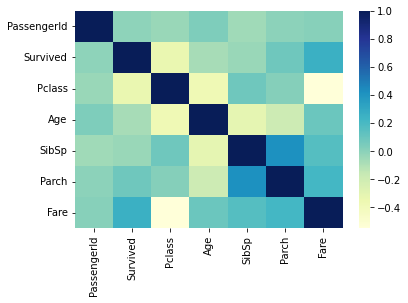

In [24]:
# titanic_data.corr() 
# the following heatmap shows the correlation between each columns blue +ve corr and yellow -ve corr

sns.heatmap(titanic_data.corr(),cmap="YlGnBu")
plt.show()

# sex isn't correlated here because it is not numeric so we have to make it numeric

In [26]:
# shuffle and take 80/20 train to test data

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_indicies, test_indicies in split.split(titanic_data, titanic_data[["Survived", "Pclass", "Sex"]]):
    strat_train_set = titanic_data.loc[train_indicies]
    strat_test_set = titanic_data.loc[test_indicies]


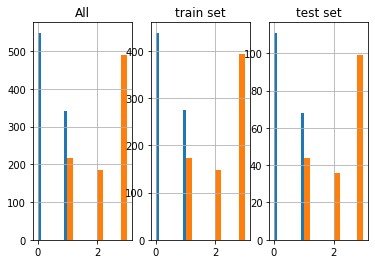

In [32]:
plt.subplot(1,3,1,title="All")
titanic_data["Survived"].hist()
titanic_data["Pclass"].hist()
# titanic_data["Sex"].hist()

plt.subplot(1,3,2,title="train set")
strat_train_set["Survived"].hist()
strat_train_set["Pclass"].hist()
# strat_train_set["Sex"].hist()

plt.subplot(1,3,3,title="test set")
strat_test_set["Survived"].hist()
strat_test_set["Pclass"].hist()
# strat_test_set["Sex"].hist()

plt.show()